In [5]:
# Import necesary libraries
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

In [6]:
# Download historical data for required stocks
tickers = ["MSFT","AMZN","AAPL","CSCO","IBM","FB"]

In [7]:
close_prices = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()

In [8]:
# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    close_prices[ticker] = yf.download(ticker,start,end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
# Handling NaN Values
close_prices.fillna(method='bfill',axis=0,inplace=True) # Replaces NaN values with the next valid value along the column
daily_return = close_prices.pct_change() # Creates dataframe with daily return for each stock

In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<BarContainer object of 6 artists>

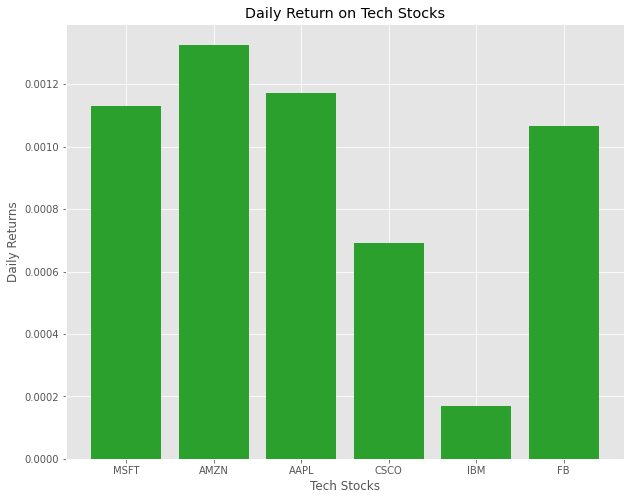

In [18]:
fig, ax = plt.subplots()
plt.style.use('ggplot')
ax.set(title="Daily Return on Tech Stocks", xlabel="Tech Stocks", ylabel="Daily Returns")
plt.bar(daily_return.columns, daily_return.mean(), color="tab:green")